<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/ProjectCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from numpy import asarray
from PIL import Image,ImageFilter
import math

In [ ]:
def Cluster_pixel(array,value):
  kmeans_kwargs={
         "init" : "k-means++",
         "n_init": 5,
         "max_iter":300,
         "random_state":42
  }
  kmeans=KMeans(n_clusters=3,**kmeans_kwargs)
  kmeans.fit(array)
  labels=kmeans.labels_
  centroids=kmeans.cluster_centers_
  centroids=centroids.reshape(len(centroids))
  vt_min=np.argmin(abs(centroids-value))
  backgr_pixel= array[np.where(labels==vt_min)]
  return backgr_pixel
def UyXma(arr):
  uy=arr.sum()/len(arr)
  temp=(uy-arr)**2
  print(temp)
  t=temp.sum()
  xma=math.sqrt(t*(1/len(arr)))
  return uy,xma
def CreateMaskObj(img_hsv,upper_arr,lower_arr):
  mask=cv2.inRange(img_hsv,lower_green,upper_green)
  mask=1-mask/255
  mask_obj1=[mask,mask,mask]
  mask_obj1=(np.stack(mask_obj1,axis=2)).astype('uint8')
  #mask_I=Image.fromarray(mask_obj1)
  #mask_I=mask_I.filter(ImageFilter.ModeFilter(9))
  #mask_I=asarray(mask_I)
  return mask_obj1
def ImagetoImage(img,background):
  img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  H_channel=img_hsv[:,:,0].copy()
  H_vecfit=H_channel.reshape((H_channel.shape[0]*H_channel.shape[1],1))
  S_channel=img_hsv[:,:,1].copy()
  S_vecfit=S_channel.reshape((S_channel.shape[0]*S_channel.shape[1],1))
  H_backgr=Cluster_pixel(H_vecfit,60)
  S_backgr=Cluster_pixel(S_vecfit,200)
  H_max,H_min=np.max(H_backgr),np.min(H_backgr)
  S_max,S_min=np.max(S_backgr),np.min(S_backgr)
  lower_green=np.array([H_min,S_min,0])
  upper_green=np.array([H_max,S_max,255])
  return lower_green,upper_green
  

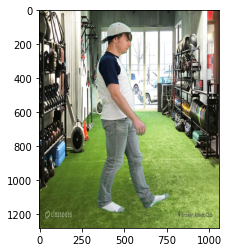

In [ ]:
img=cv2.imread('/content/chroma-key-1278020_1280.jpg')
background=cv2.imread('/content/Weightlifting-Gym-Zoom-Background.jpg',1)
background=cv2.resize(background,(img.shape[1],img.shape[0]))
lower_green,upper_green=ImagetoImage(img,background)
mask_obj1=CreateMaskObj(cv2.cvtColor(img,cv2.COLOR_BGR2HSV),upper_green,lower_green)
res=(img*mask_obj1).astype('uint8')+(background*(1-mask_obj1)).astype('uint8')
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
plt.show()

Video

In [ ]:
background=cv2.imread('/content/cce0c7db236b5e269c7721de801bb8f7.jpg',1)
background=cv2.resize(background,(1280,720))
#Đọc video, background tĩnh
cap=cv2.VideoCapture('/content/Video backgound nen xanh [Chroma key Backgrounds].mp4')
if (cap.isOpened()==False):
    print("Error opening video stream or file")
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (1280,720))
temp=0
frame_view=0
while (True):
   ret,frame=cap.read()
   if ret==True:
      frame=cv2.resize(frame,(1280,720))
      frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
      if (frame_view==1): 
         plt.imshow(frame_hsv)
         break
      if (temp<1):
         lower_green,upper_green=ImagetoImage(frame,background)
         temp+=1
      mask_obj1=CreateMaskObj(frame_hsv,upper_green,lower_green)
      res=(frame*mask_obj1).astype('uint8')+(background*(1-mask_obj1)).astype('uint8')
      out.write(res)
      if cv2.waitKey(1) == ord('q'):
        break
   else: break
out.release()


Webcam


In [ ]:
def show_webcam(mirror=False):
  global background
  get_pixel=0
  threshold=0
  cam = cv2.VideoCapture(0)
  while True:
        ret_val, img = cam.read()
        if mirror: 
            img = cv2.flip(img, 1)
        if get_pixel==0:
            img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
            plt.imshow(img_hsv)
            plt.show()
            get_pixel=1
        if threshold==0:
            lower,upper=ImagetoImage(img,background)   
            threshold=1
        res=RemoveBackground(img,background,lower,upper)
        cv2.imshow('my webcam',res) 
        if cv2.waitKey(1) == 27: 
            break  # esc to quit
  cv2.destroyAllWindows()
